In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
stats = dict()
with open("arena_final_again_fixed_conflict.txt", "r") as file:
    for line in file:
        data = eval(line.strip())
        if data["name"] not in stats:
            stats[data["name"]] = []
        stats[data["name"]].append({
            "steps": data["steps"],
            "n_aborts": data["n_aborts"],
            "n_successes": data["n_successes"],
        })

/var/folders/14/9k3qr8k91072cg75p1zkt4540000gn/T/ipykernel_27161/2961099063.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


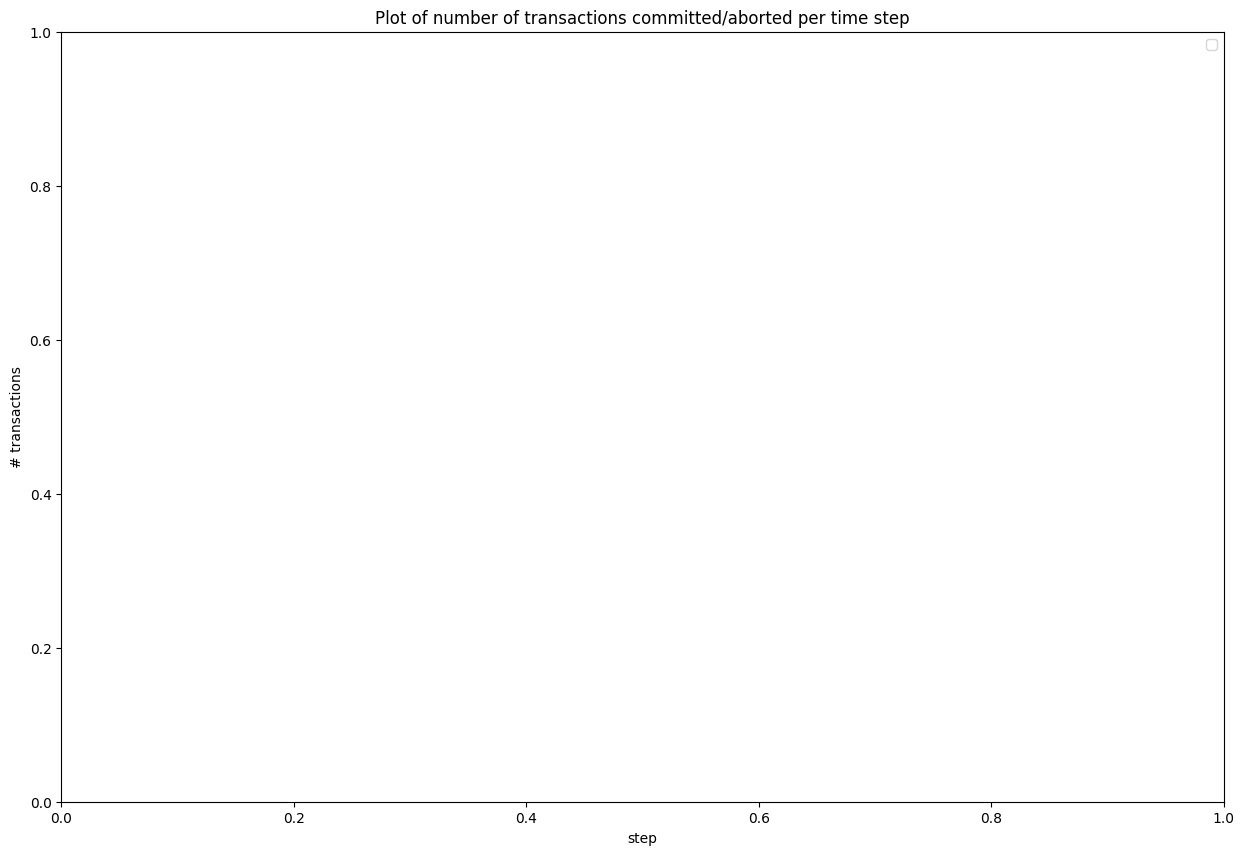

In [20]:
plt.figure(figsize=(15,10))
t_cutoff = 600
for contestant in stats.keys():
    plt.plot([elem["steps"] for elem in stats[contestant] if elem["steps"] < t_cutoff], [elem["n_successes"] for elem in stats[contestant] if elem["steps"] < t_cutoff], label=f"{contestant}-success")
    plt.plot([elem["steps"] for elem in stats[contestant] if elem["steps"] < t_cutoff], [elem["n_aborts"] for elem in stats[contestant] if elem["steps"] < t_cutoff], label=f"{contestant}-aborts")
plt.xlabel("step") 
plt.ylabel("# transactions")
plt.legend()
plt.title("Plot of number of transactions committed/aborted per time step")
plt.show()